In [1]:
# Validate the data
#from mlflow.artifacts import download_artifacts
import pandas as pd

def pd_read_parquet_from_mlflow(
    #run_id: str, 
    artifact_path: str) -> pd.DataFrame:
    """Load a parquet file from an mlflow artifact.

    Args:
        run_id: the mlflow Run ID
        artifact_path: the relative (to the run) path to the parquet file
    
    Returns:
        pd.DataFrame of the loaded artifact
    """
    #local_path = download_artifacts(run_id=run_id, artifact_path=artifact_path)
    return pd.read_parquet(artifact_path)

#run_id = 'c65b6c792ff240d9a2a415dbca52e4e2'
# path = 'data.parquet'
# df = pd_read_parquet_from_mlflow(path)
# df.head()
path = 'data (1).parquet'
df = pd_read_parquet_from_mlflow(path)
df.head()

,user_id,ts,active_time_m7,active_time_m14,active_time_s7,active_time_s14,activity_percent_m7,activity_percent_m14,activity_percent_s7,activity_percent_s14,...,phq_q4,phq_q5,phq_q6,phq_q7,phq_q8,phq_q9,phq2_total,phq8_total,phq9_total,deployment
0,us-east-1:1b087523-b47b-421c-97c4-74da80564598,2018-09-25 18:17:26.647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.0,1.0,1.0,1.0,NaN,3.0,9.0,NaN,hr-rct-cue-1
1,us-east-1:ea986d8e-e87d-458b-a798-1999fbbff05b,2018-09-26 17:13:52.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,NaN,4.0,21.0,NaN,hr-rct-cue-1
2,us-east-1:8dfca9b6-22b6-4155-8a70-ce3e1211a684,2018-09-27 19:04:15.124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,1.0,NaN,6.0,22.0,NaN,hr-rct-cue-1
3,us-east-1:77f43bb4-fe8e-4a50-a4fc-41bc14b11f9d,2018-10-01 22:01:32.622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,2.0,2.0,0.0,NaN,2.0,10.0,NaN,hr-rct-cue-1
4,us-east-1:4940dfa3-1c01-49f2-9cdd-029291d7b7a8,2018-10-05 21:08:52.441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,3.0,1.0,0.0,NaN,6.0,18.0,NaN,hr-rct-cue-1


In [2]:
df = df[df.deployment == 'hr-ascent-1']
df.shape

(2924, 158)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df.activity_percent_m7

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2919    0.077877
2920         NaN
2921    0.026321
2922         NaN
2923         NaN
Name: activity_percent_m7, Length: 2924, dtype: float64

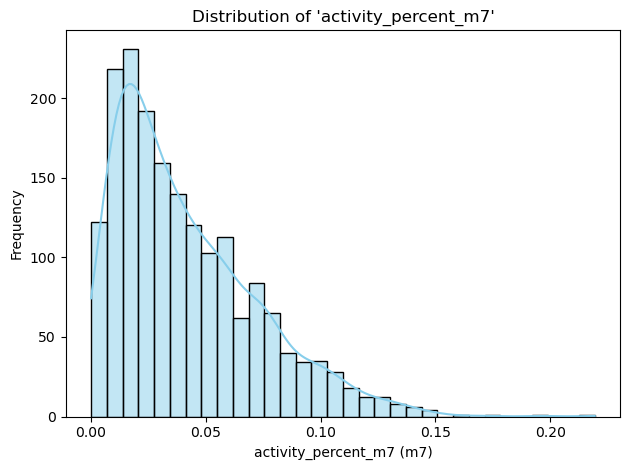

In [17]:
sns.histplot(df['activity_percent_m7'].dropna(),  kde=True, color='skyblue')
plt.title("Distribution of 'activity_percent_m7'")
plt.xlabel('activity_percent_m7 (m7)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [5]:
df['activity_percent_m7'].isna().sum()

1114

In [6]:
df['activity_percent_m7'].notna().sum()

1810

In [8]:
def classify_phq(score):
    if 0 <= score <= 4:
        return 'Minimal Depression'
    elif 5 <= score <= 9:
        return 'Mild Depression'
    elif 10 <= score <= 14:
        return 'Moderate Depression'
    elif 15 <= score <= 19:
        return 'Moderately Severe Depression'
    elif 20 <= score <= 27:
        return 'Severe Depression'
    else:
        return 'Invalid Score'
def clean_ethnicity(x):
    if not isinstance(x, (list, np.ndarray)):
        return None
    if len(x) < 2:
        return str(x[0])
    return 'Multiple'

def classify_ethnicity(ethnicity_val):
    if ethnicity_val == 'White':
        return True
   # elif ethnicity_val == 'None':
    #    return 'Declined'
    else:
        return False

'''def major_depressive_disorder(score):
    if 0 <= score <= 14:
        return False
    elif 15 <= score <= 27:
        return True
    else:
        return 'Invalid Disorder '''


# Apply the classification function to the phq_total column
df['ethnicity_white'] =df.ethnicity.apply(clean_ethnicity).astype(str).apply(classify_ethnicity)

# Apply the classification function to the phq_total column
df['phq_category'] = df['phq9_total'].apply(classify_phq)

# Apply the classification function to the phq_total column
#df['major_depressive_disorder'] = df['phq9_total'].apply(major_depressive_disorder)


# Specify the category order for phq_category
category_order = ['Minimal Depression', 'Mild Depression', 'Moderate Depression', 'Moderately Severe Depression', 'Severe Depression']
df['phq_category'] = pd.Categorical(df['phq_category'], categories=category_order, ordered=True)

In [13]:
data =  ['activity_percent_m7', 'age_bucket', 'phq_category', 'ethnicity_white', 'gender', 'phq9_total',] # 'major_depressive_disorder']
df_clean= df[data].dropna(subset=data)
df_clean.head()

,activity_percent_m7,age_bucket,phq_category,ethnicity_white,gender,phq9_total
56,0.020040,45-54,Severe Depression,False,Woman,21.0
71,0.056374,18-24,Severe Depression,False,Woman,21.0
79,0.104464,35-44,Severe Depression,False,Woman,22.0
84,0.029692,35-44,Minimal Depression,True,Woman,0.0
88,0.070337,18-24,Moderate Depression,True,Man,12.0


In [14]:
import plotly.graph_objects as go
from statsmodels.distributions.empirical_distribution import ECDF

# Example list of age buckets (ensure these exist in your DataFrame)
age_buckets = ['16-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84']

# Create a Plotly figure
fig = go.Figure()

# For each age bucket, filter the DataFrame and compute ECDF
for bucket in age_buckets:
    # Filter the DataFrame for the current age bucket
    sub_df = df[df['age_bucket'] == bucket]

    # If there are rows in this subgroup, compute and plot the ECDF
    if len(sub_df) > 0:
        # Drop any NaNs in active_time_m7
        values = sub_df['activity_percent_m7'].dropna()

        # Compute the ECDF using statsmodels
        ecdf = ECDF(values)
        
        # ecdf.x are the sorted data points, ecdf.y are the cumulative probabilities
        x_vals = ecdf.x
        y_vals = ecdf.y
        
        # Add a line trace to the figure for this age bucket
        fig.add_trace(
            go.Scatter(
                x=x_vals,
                y=y_vals,
                mode='lines',
                name=bucket
            )
        )

# Update layout to set titles and legends
fig.update_layout(
    title='ECDF of activity_percent_m7 by Age Bucket',
    xaxis_title='activity_percent_m7',
    yaxis_title='Proportion (ECDF)',
    legend_title='Age Bucket'
)

fig.show()


In [15]:
import plotly.graph_objects as go
from statsmodels.distributions.empirical_distribution import ECDF

# Example DataFrame: df_clean
# Must have columns: ["active_time_m7", "age_bucket", "phq_category", "ethnicity_white", "gender", "major_depressive_disorder"]

groupings = {
    'age_bucket': ['16-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84'],
    'phq_category': ['Minimal Depression', 'Mild Depression', 'Moderate Depression',
                     'Moderately Severe Depression', 'Severe Depression'],
    'ethnicity_white': [True, False],
    'gender': ['Woman', 'Man', 'Transgender', 'Gender Queer Or Nonconforming',],
    #'major_depressive_disorder': ['Invalid Disorder', True, False]
}

for grouping_var, categories in groupings.items():
    # Create a new figure for each grouping
    fig = go.Figure()

    # For each category in this grouping, filter and plot the ECDF of active_time_m7
    for cat in categories:
        # Filter rows where the grouping_var matches cat
        sub_df = df[df[grouping_var] == cat]
        if sub_df.empty:
            continue
        
        # Drop any NaN values in active_time_m7
        values = sub_df['activity_percent_m7'].dropna()
        if values.empty:
            continue
        
        # Compute ECDF
        ecdf = ECDF(values)
        x_vals = ecdf.x
        y_vals = ecdf.y
        
        # Add a Scatter trace for this category
        fig.add_trace(
            go.Scatter(
                x=x_vals,
                y=y_vals,
                mode='lines',
                name=str(cat)  # This label shows in the legend
            )
        )
    
    # Update layout for this figure
    fig.update_layout(
        title=f"ECDF of activity_percent_m7 by {grouping_var}",
        xaxis_title="activity_percent_m7",
        yaxis_title="Proportion (ECDF)",
        legend_title=grouping_var,
        height=600,
        width=800
    )
    
    # Show (or save) the figure
    fig.show()


In [16]:
#Final code 
import statsmodels.formula.api as smf

def get_binary_age(age_bucket: str):
    if '85' in age_bucket:
        return 'old'
    ub = int(age_bucket.strip().split('-')[-1])
    if ub < 45:
        return 'young'
    return 'old'

df['age_binary'] = df.age_bucket.apply(lambda x: None if pd.isnull(x) else get_binary_age(x))

def analyze(inf: str, target: str, df: pd.DataFrame):
    df_clean = df.dropna(subset=[inf, target, 'sex', 'age_binary'])
    # Drop 'Other' because data is so small.
    df_clean = df_clean[df_clean.sex != 'Other']
    df_clean['sex'] = df_clean.sex.astype(str)
    df_clean['age_binary'] = df_clean.age_binary.astype(str)
    
    # Fit the linear regression model
    model = smf.ols(formula=f'{target} ~ {inf} : C(sex) : C(age_binary)', data=df_clean).fit()

    # Display the summary of the model
    return model.summary()


print(analyze('activity_percent_m7', 'phq8_total', df))

                            OLS Regression Results                            
Dep. Variable:             phq8_total   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     7.561
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           4.87e-06
Time:                        18:26:30   Log-Likelihood:                -5791.8
No. Observations:                1810   AIC:                         1.159e+04
Df Residuals:                    1805   BIC:                         1.162e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------